## Classification Boundary Visualization

Dataset: 1025 patients
Risk distribution with boundaries (≤0.31, ≥0.78):
risk_category
High-Risk    355
Low-Risk     346
Med-Risk     324
Name: count, dtype: int64


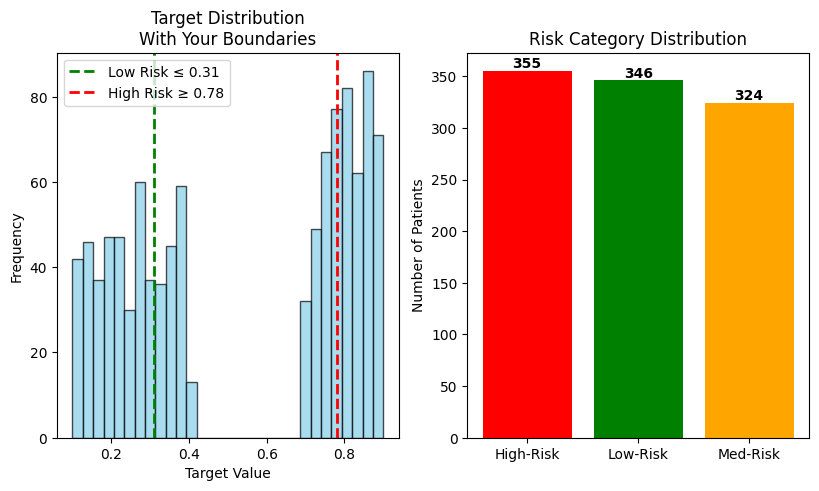

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load and clean data
df = pd.read_csv('/content/heart.csv')
df_clean = df.dropna(axis=1, how='all').dropna()

print(f"Dataset: {len(df_clean)} patients")

# boundaries
def categorize_risk(target_value):
    if target_value <= 0.31:
        return 'Low-Risk'
    elif target_value >= 0.78:
        return 'High-Risk'
    else:
        return 'Med-Risk'

df_clean['risk_category'] = df_clean['target'].apply(categorize_risk)

print("Risk distribution with boundaries (≤0.31, ≥0.78):")
risk_dist = df_clean['risk_category'].value_counts()
print(risk_dist)

# Prepare features and target
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
            'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
X = df_clean[features]
y = df_clean['risk_category']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Visualization
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
# Target distribution with your boundaries
plt.hist(df_clean['target'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(x=0.31, color='green', linestyle='--', linewidth=2, label='Low Risk ≤ 0.31')
plt.axvline(x=0.78, color='red', linestyle='--', linewidth=2, label='High Risk ≥ 0.78')
plt.xlabel('Target Value')
plt.ylabel('Frequency')
plt.title('Target Distribution\nWith Your Boundaries')
plt.legend()

plt.subplot(1, 3, 2)
# Risk category distribution
colors = ['red', 'green', 'orange']
plt.bar(risk_dist.index, risk_dist.values, color=colors)
plt.title('Risk Category Distribution')
plt.ylabel('Number of Patients')
for i, v in enumerate(risk_dist.values):
    plt.text(i, v, str(v), ha='center', va='bottom', fontweight='bold')
plt.show()

# Interpretation:

- The samples in the risk category sections are balanced.
- A lack of samples can be observed in between the target range of 0.43 and 0.68 approximately.
- Binary classification can be used for the ML model trained with this dataset however since the majority of the stakeholders requested a multi-classification system the heart disease risk prediction ML model will be a multi-classification model.